# Importing

In [23]:
from PIL import Image
from matplotlib import image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2, fftfreq
import imageio

# Exercise 3

In [3]:
def u(x):
    return np.sin(5*x)

In [15]:
def sampling(T: float, sampling_range: float):
    
    x_true=np.linspace(-sampling_range,sampling_range, 1000)
    y_true=u(x_true)
    
    num_samples_half = round(sampling_range/T)
    x = np.array([T*i for i in range(-num_samples_half, num_samples_half)])
    
    samples = u(x)
    plt.title(f"Sampling rate of {T}")
    plt.plot(x,samples,"r")
    plt.plot(x_true,y_true, "g--")
    plt.grid()
    plt.show()

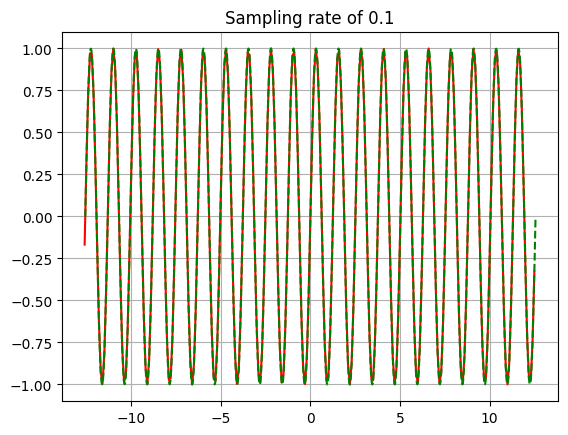

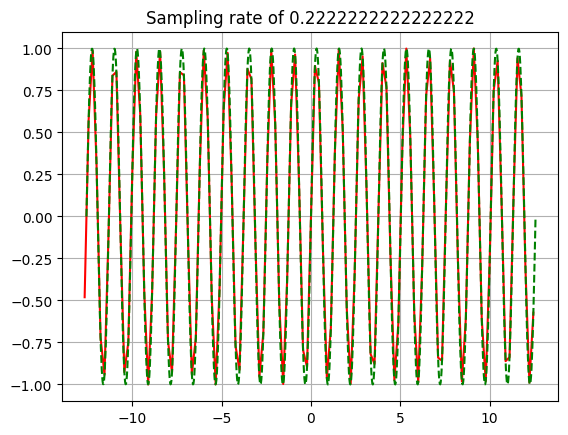

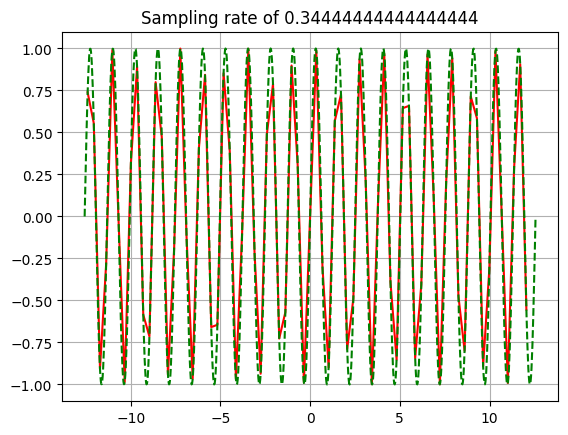

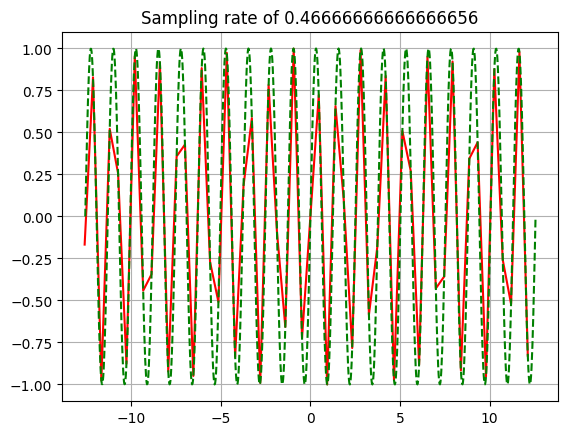

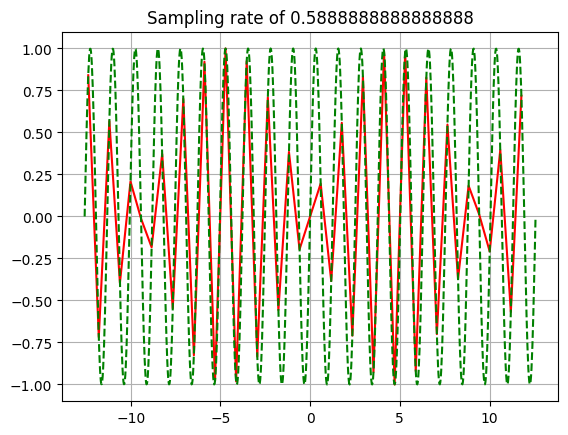

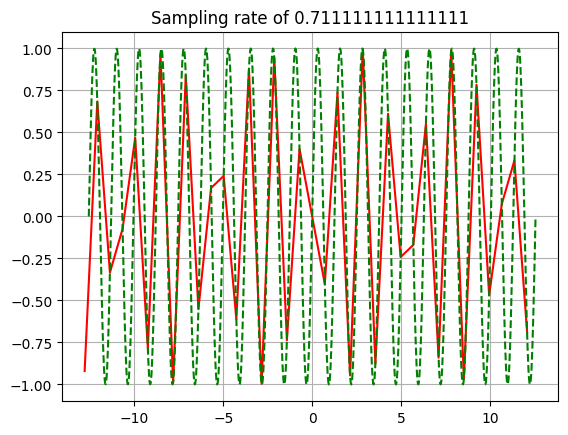

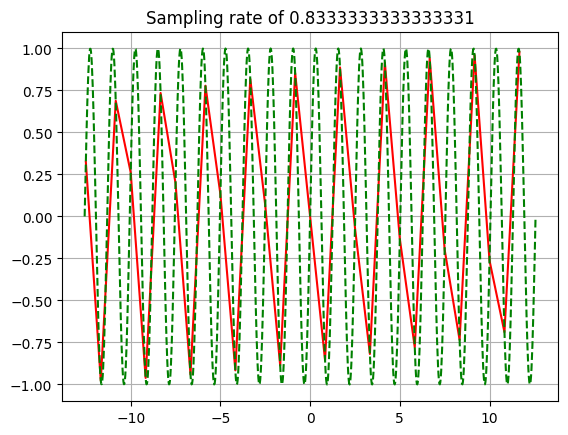

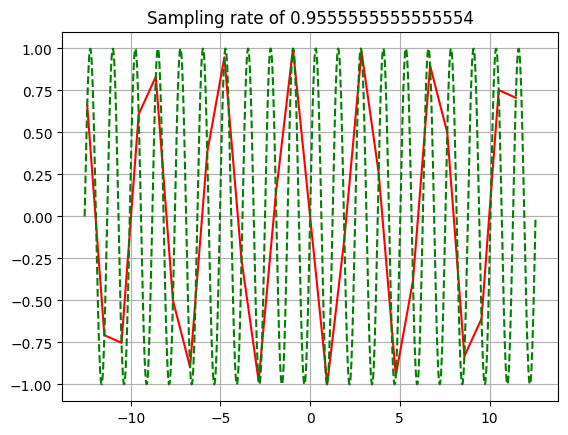

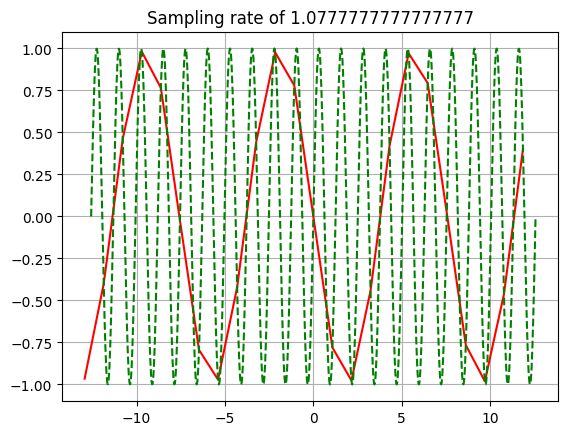

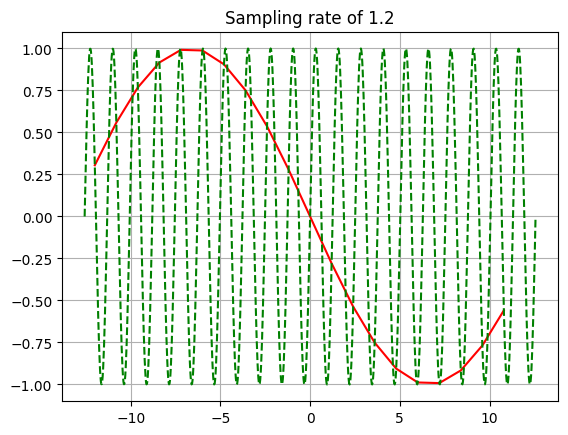

In [16]:
sampling_range=4*np.pi
rates = np.linspace(0.1,1.2,10)
for rate in rates:
    sampling(rate, sampling_range)

**Observations**  
For $T=0.1$, we lose no information regarding the form of the signal. This follows the theory that states that no information is lost when sampling at a higher frequency than the Nyquist frequency. The function $u(x)=\sin(5x)$ has a frequency $f=5/2\pi$, which yields the Nyquist frequency $f_{Ny}=2f =5/\pi$, which corresponds to a sampling rate of $T_{Ny} = 1/f_{Ny} \approx 0.6$. Clearly $0.1<0.6$.  
For $T=1.2$, we get aliasing, and the signal seems like a completely different signal from the real signal. This comes from information loss as the sampling rate $T = 1.2 > 0.6 = T_{Ny}$.

# Exercise 4

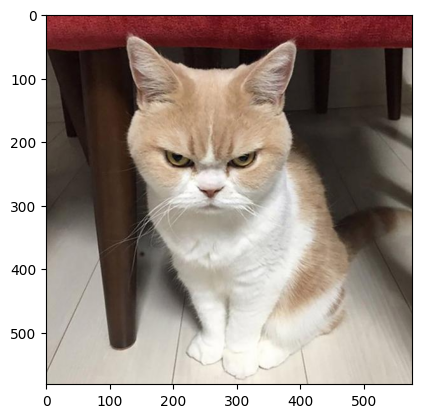

In [2]:
image_source = mpimg.imread("Data/cat.jpg")
plt.imshow(image_source)
plt.show()

In [134]:
image = image_source.copy()
np.shape(image)

(582, 576, 3)

## Exercise 4 part a

In [219]:
def fourier_processing(image_col: np.array, threshold=30, H_type="out"):
    a=np.copy(image_col)
    A=fft(a)
    
    #Applying H
    if H_type=="out":
        A[threshold:-threshold]=0
    else:
        A[:threshold]=0
        A[-threshold:]=0
    B=A
    
    b=ifft(B)
    
    return np.mean(np.abs(b.imag))
        

In [220]:
thresholds = np.arange(1,300,2)
outer = {"slice_1":[],"slice_2":[], "slice_3":[]}
inner = {"slice_1":[],"slice_2":[], "slice_3":[]}

img_slice_1 = image[:,20,2]
img_slice_2 = image[:,200,2]
img_slice_3 = image[:,500,2]


for threshold in thresholds:
    outer["slice_1"].append(fourier_processing(img_slice_1, threshold=threshold, H_type="out"))
    inner["slice_1"].append(fourier_processing(img_slice_1, threshold=threshold, H_type="in"))
    
    outer["slice_2"].append(fourier_processing(img_slice_2, threshold=threshold, H_type="out"))
    inner["slice_2"].append(fourier_processing(img_slice_2, threshold=threshold, H_type="in"))
    
    outer["slice_3"].append(fourier_processing(img_slice_3, threshold=threshold, H_type="out"))
    inner["slice_3"].append(fourier_processing(img_slice_3, threshold=threshold, H_type="in"))


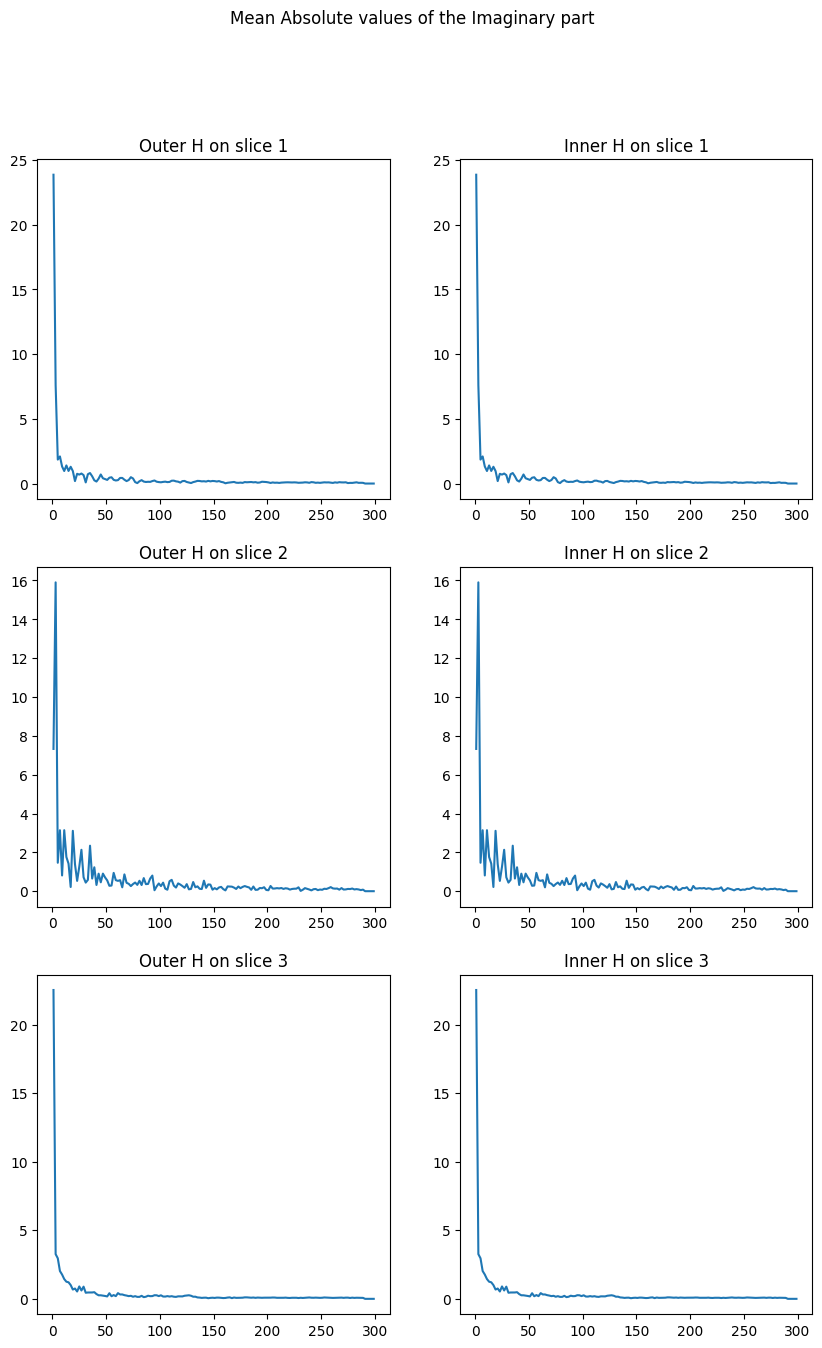

In [222]:
fig,axs = plt.subplots(3,2, figsize=(10,15))

fig.suptitle("Mean Absolute values of the Imaginary part")

axs[0,0].plot(thresholds, outer["slice_1"])
axs[0,0].set_title("Outer H on slice 1")

axs[0,1].plot(thresholds, inner["slice_1"])
axs[0,1].set_title("Inner H on slice 1")

axs[1,0].plot(thresholds, outer["slice_2"])
axs[1,0].set_title("Outer H on slice 2")

axs[1,1].plot(thresholds, inner["slice_2"])
axs[1,1].set_title("Inner H on slice 2")

axs[2,0].plot(thresholds,outer["slice_3"])
axs[2,0].set_title("Outer H on slice 3")

axs[2,1].plot(thresholds,inner["slice_3"])
axs[2,1].set_title("Inner H on slice 3")



plt.show()

## Exercise 4 part b

In [131]:
def blurr(image: np.array, threshold=30, H_type="out"):
    a=np.copy(image)
    A=fft2(a)
    
    #Applying H
    if H_type=="out":
        A[:, threshold:-threshold, :]=0
    else:
        A[:, :threshold, :]=0
        A[:,-threshold:, :]=0
    B=A
    
    #Inverse transform and preparing for picture
    b=ifft2(B)
    b=(b.real).astype(np.int64)
    
    if np.max(b)>255 or np.min(b)<0:
        print(f"The transformed array has the values min:{np.min(b)} and max:{np.max(b)} for H_type:{H_type} and threshold:{threshold}")
        b[b<0]=0
        b[b>255]=255
        
    return b
        

In [132]:
b1_out = blurr(image, threshold=1)
b2_out = blurr(image, threshold=5)
b3_out = blurr(image, threshold=30)
b4_out = blurr(image, threshold=300)

b1_in = blurr(image, H_type="in", threshold=1)
b2_in = blurr(image, H_type="in", threshold=5)
b3_in = blurr(image, H_type="in", threshold=30)
b4_in = blurr(image, H_type="in", threshold=300)

The transformed array has the values min:-12 and max:258 for H_type:out and threshold:5
The transformed array has the values min:-10 and max:270 for H_type:out and threshold:30
The transformed array has the values min:-156 and max:186 for H_type:in and threshold:1
The transformed array has the values min:-160 and max:146 for H_type:in and threshold:5
The transformed array has the values min:-87 and max:130 for H_type:in and threshold:30


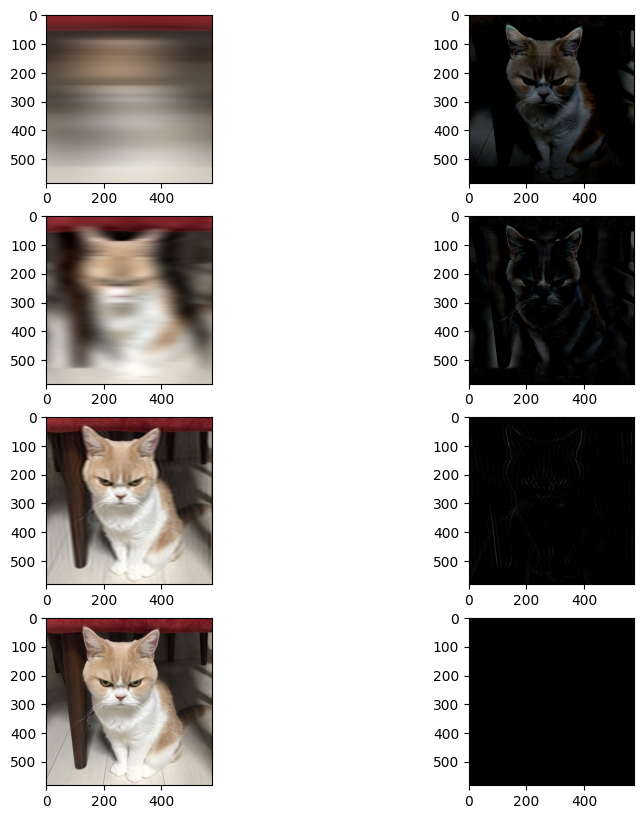

In [133]:
fig,axs = plt.subplots(4,2, figsize=(10,10))

axs[0,0].imshow(b1_out)
axs[1,0].imshow(b2_out)
axs[2,0].imshow(b3_out)
axs[3,0].imshow(b4_out)

axs[0,1].imshow(b1_in)
axs[1,1].imshow(b2_in)
axs[2,1].imshow(b3_in)
axs[3,1].imshow(b4_in)

plt.show()

# Sampling gif

In [74]:
def make_sampling_gif():
    
    def sampling_v2(T: float, sampling_range: float, save_dict: dict):
        x_true=np.linspace(-sampling_range,sampling_range, 1000)
        y_true=u(x_true)

        num_samples_half = round(sampling_range/T)
        x = np.array([T*i for i in range(-num_samples_half, num_samples_half)])

        samples = u(x)

        save_dict["sampling_rate"].append(T)
        save_dict["samples_x"].append(x)
        save_dict["samples_y"].append(samples)
        
    #Initializions
    save_dict = {"sampling_rate":[], "samples_x":[], "samples_y":[], "true":{"x":None,"sy":None}}
    sampling_range=4*np.pi
    rates = np.linspace(0.1,1.2,10)
    time=list(range(31))
    
    #Calculating samples and adding them to save_dict
    for rate in rates:
        sampling_v2(rate, sampling_range, save_dict)
    
    #Adding a high resolution picture of the function for comparison
    x_true=np.linspace(-sampling_range,sampling_range, 1000)
    y_true=u(x_true)
    save_dict["true"]["x"]=x_true
    save_dict["true"]["y"]=y_true
    
    def create_frame(t):
        plt.plot(save_dict["true"]["x"],save_dict["true"]["y"],"g--")

        if t%3!=0:
            t_pic=t//3
            T = save_dict["sampling_rate"][t_pic]
            plt.title(f"Sampling rate of {T}")
            plt.plot(save_dict["samples_x"][t_pic],save_dict["samples_y"][t_pic],"r.")

        if t%3==2:
            plt.plot(save_dict["samples_x"][t_pic],save_dict["samples_y"][t_pic],"r")

        plt.savefig(f'./img/img_{t}.png', 
                    transparent = False,  
                    facecolor = 'white')
        plt.close()
        
    #Create and save frames to the img/ folder
    for t in time:
        create_frame(t)
        
    #Read the images from the img/ folder
    frames = []
    for t in time:
        image = imageio.v2.imread(f'./img/img_{t}.png')
        frames.append(image)
    
    #Save the gif
    imageio.mimsave('./sampling.gif',
                    frames,          
                    duration = 1000, 
                    loop=20)         

In [76]:
make_sampling_gif()

# Trashcan

In [201]:
def fourier_processing(image_col: np.array, threshold=30, H_type="out"):
    a=np.copy(image_col)
    A=fft(a)
    
    #Applying H
    if H_type=="out":
        A[threshold:-threshold]=0
    else:
        A[:threshold]=0
        A[-threshold:]=0
    B=A
    
    #Inverse transform and preparing for picture
    b=ifft(B)
    
    mean_absolute_diff = np.mean(np.abs(b.real-a))
    mean_absolute_imag = np.mean(np.abs(b.imag))
    mean_absolute_real = np.mean(np.abs(b.real))
        
    return mean_absolute_diff, mean_absolute_imag, mean_absolute_real
        

In [204]:
thresholds = np.arange(1,300,2)
out_stats = []
in_stats = []

img_slice = image[:,20,2]


for threshold in thresholds:
    out_stats.append(fourier_processing(img_slice, threshold=threshold, H_type="out"))
    in_stats.append(fourier_processing(img_slice, threshold=threshold, H_type="in"))
    
mean_abs_diff_out = np.array(out_stats)[:,0]
mean_abs_imag_out = np.array(out_stats)[:,1]
mean_abs_real_out = np.array(out_stats)[:,2]
mean_abs_diff_in = np.array(in_stats)[:,0]
mean_abs_imag_in = np.array(in_stats)[:,1]
mean_abs_real_in = np.array(in_stats)[:,2]

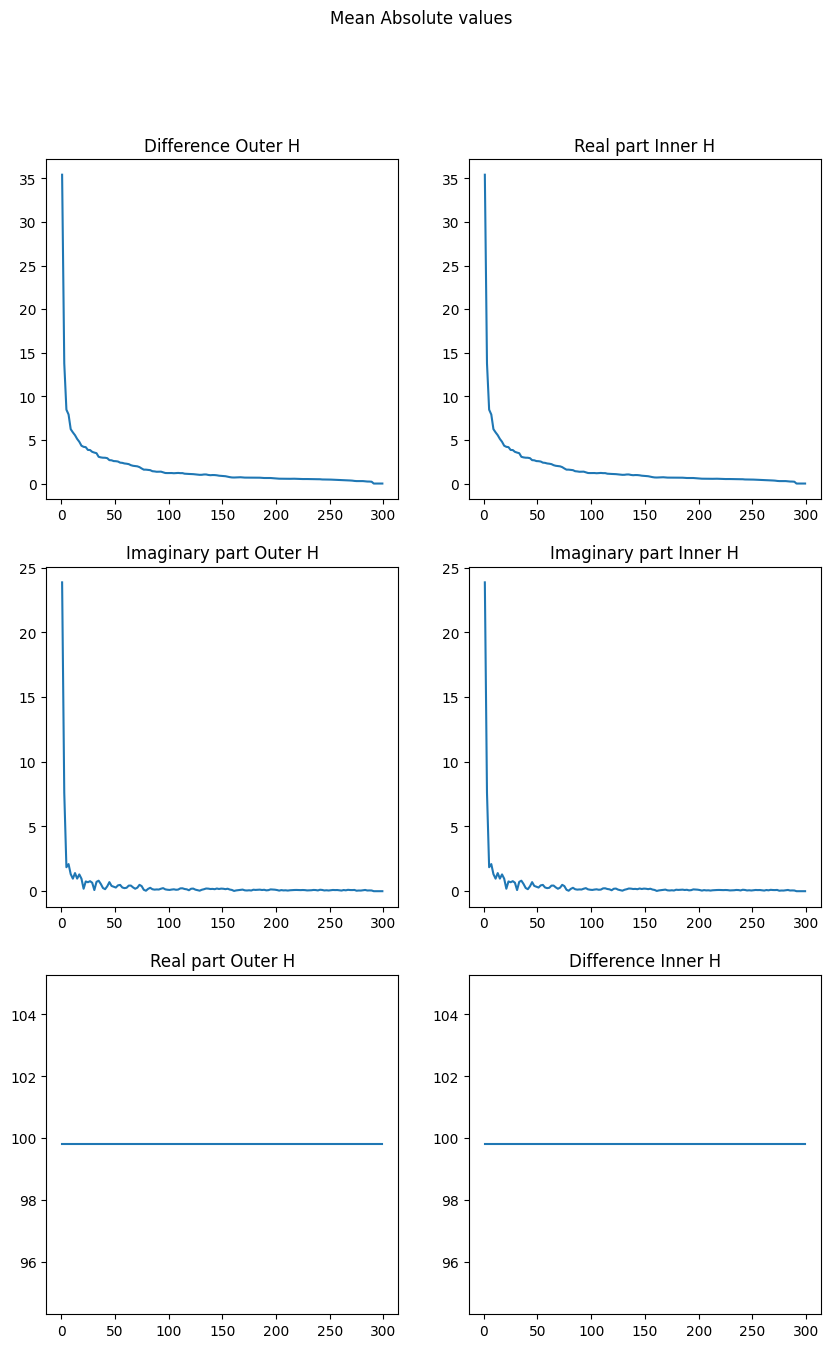

In [214]:
fig,axs = plt.subplots(3,2, figsize=(10,15))

fig.suptitle("Mean Absolute values")

axs[0,0].plot(thresholds, mean_abs_diff_out)
axs[0,0].set_title("Difference Outer H")

axs[2,1].plot(thresholds, mean_abs_diff_in)
axs[2,1].set_title("Difference Inner H")

axs[1,0].plot(thresholds, mean_abs_imag_out)
axs[1,0].set_title("Imaginary part Outer H")

axs[1,1].plot(thresholds, mean_abs_imag_in)
axs[1,1].set_title("Imaginary part Inner H")

axs[2,0].plot(thresholds,mean_abs_real_out)
axs[2,0].set_title("Real part Outer H")

axs[0,1].plot(thresholds,mean_abs_real_in)
axs[0,1].set_title("Real part Inner H")



plt.show()

# Gøy

In [195]:
N=300
T=2*np.pi/N
x = np.linspace(0,2*np.pi,N)
ns = np.arange(N)
y = np.sin(2*np.pi*5*x)+np.sin(2*np.pi*10*x)

In [196]:
np.sum(y)

2.863644825648215

In [197]:
y_hat = fft(y)

In [198]:
y_hat[3]

(2.891253478065119+0.008927008442404002j)

In [199]:
y_hat.real[0:15]

array([2.86364483, 2.86668775, 2.87585339, 2.89125348, 2.91307805,
       2.94160138, 2.97719078, 3.02031882, 3.0715797 , 3.13171095,
       3.20162194, 3.28243147, 3.37551748, 3.48258352, 3.60574833])

In [200]:
xf = fftfreq(N, T)[:N//2]

In [202]:
xf

array([ 0.        ,  0.15915494,  0.31830989,  0.47746483,  0.63661977,
        0.79577472,  0.95492966,  1.1140846 ,  1.27323954,  1.43239449,
        1.59154943,  1.75070437,  1.90985932,  2.06901426,  2.2281692 ,
        2.38732415,  2.54647909,  2.70563403,  2.86478898,  3.02394392,
        3.18309886,  3.3422538 ,  3.50140875,  3.66056369,  3.81971863,
        3.97887358,  4.13802852,  4.29718346,  4.45633841,  4.61549335,
        4.77464829,  4.93380324,  5.09295818,  5.25211312,  5.41126807,
        5.57042301,  5.72957795,  5.88873289,  6.04788784,  6.20704278,
        6.36619772,  6.52535267,  6.68450761,  6.84366255,  7.0028175 ,
        7.16197244,  7.32112738,  7.48028233,  7.63943727,  7.79859221,
        7.95774715,  8.1169021 ,  8.27605704,  8.43521198,  8.59436693,
        8.75352187,  8.91267681,  9.07183176,  9.2309867 ,  9.39014164,
        9.54929659,  9.70845153,  9.86760647, 10.02676141, 10.18591636,
       10.3450713 , 10.50422624, 10.66338119, 10.82253613, 10.98

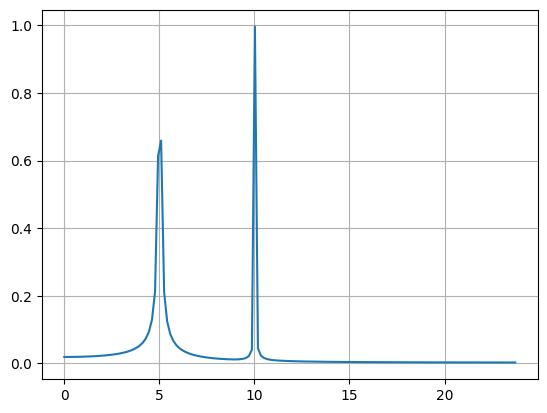

In [201]:
plt.plot(xf, 2.0/N * np.abs(y_hat[0:N//2]))
plt.grid()
plt.show()